# Continuous Bag of Words (CBOW) Model

In this exam, we will create a CBOW model using a sample Arabic traffic corpus. The corpus consists of sentences describing various traffic scenarios. The goal of the CBOW model is to predict a target word based on its surrounding context words.

# Importing Required Libraries

In this step, we import the necessary libraries to build and train the Continuous Bag of Words (CBOW) model.

- **TensorFlow and Keras**: Used to build the neural network model, including the layers like `Embedding`, `Dense`, and `Lambda`.
- **Tokenizer**: A utility from Keras for tokenizing and processing text data.
- **NumPy**: Used for handling numerical operations, particularly for processing arrays and data manipulation.

These libraries will provide the essential tools for text preprocessing and model development in the upcoming steps.

Add more if needed!


In [14]:
! pip install Tokenizer

In [2]:
! pip install TensorFlow

In [17]:
!pip install git+https://github.com/keras-team/keras-nlp.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 70.9 MB/s eta 0:00:00


In [3]:
import numpy as np

In [19]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Preparing the Corpus

In this step, we initialize the corpus that will be used for training the Continuous Bag of Words (CBOW) model. The corpus consists of Arabic sentences, each of which describes different traffic scenarios.

- **Corpus**: A collection of traffic-related sentences in Arabic.

This step sets up the text data that we will use in the upcoming stages of tokenization and model training.

In [5]:
corpus = [
    "الطريق مزدحم اليوم بسبب الحادث المروري الذي حدث صباحاً ويؤدي إلى تأخير كبير في الوصول",
    "كان الطريق مزدحما للغاية والسيارات متوقفة تقريباً نتيجة الازدحام الشديد والحركة بطيئة جداً ولا تتحسن",
    "أنا أحب الذهاب إلى السوق في الصباح الباكر لتفادي الازدحام وشراء الخضروات الطازجة دون الانتظار في الطريق",
    "السيارات بطيئة بسبب الازدحام المروري في الشارع الرئيسي والتأخير في حركة المرور خلال ساعات الذروة",
    "هناك ازدحام مروري في الشارع بسبب أعمال البناء والحفريات التي تعطل حركة السيارات وتتسبب في تأخير كبير",
    "ازدحام السيارات يزداد في المساء عندما يبدأ الجميع بالعودة إلى منازلهم من العمل وتتوقف حركة المرور بالكامل",
    "الطريق السريع يشهد ازدحاما مستمرا خلال فترة الظهيرة بسبب الشاحنات الكبيرة التي تبطئ حركة السير",
    "الحافلات والسيارات عالقة في الازدحام المروري في المنطقة التجارية مما يؤدي إلى تأخير وصول الناس إلى وجهاتهم",
    "حركة المرور مزدحمة اليوم بسبب الفعاليات التي تقام في وسط المدينة مما يزيد من صعوبة الوصول إلى هناك",
    "كان من الصعب جدا القيادة على الطريق الرئيسي اليوم بسبب الازدحام الخانق الذي استمر طوال اليوم",
    "الطريق إلى المطار مزدحم اليوم بسبب الحوادث المتكررة والتأخيرات الكبيرة في حركة المرور على الطريق السريع",
    "الشارع مزدحم بالسيارات والحافلات الكبيرة مما يجعل التنقل بطيئًا جدًا ويزيد من وقت الوصول إلى العمل",
    "ازدحام السيارات في المدينة أصبح مشكلة كبيرة خاصة خلال ساعات الذروة حيث يصعب التحرك بسرعة",
    "تفاقم الازدحام في الطرق الجانبية بسبب إغلاق الطريق الرئيسي المؤدي إلى وسط المدينة لصيانة الجسر",
    "ازدحام مروري خانق يواجه السكان يوميًا خلال تنقلهم من وإلى العمل على الطرق السريعة المؤدية إلى المدينة",
    "التأخيرات المرورية اليوم ناجمة عن سوء الأحوال الجوية والضباب الذي يعيق الرؤية ويبطئ حركة السيارات",
    "حوادث السير المتكررة على الطريق الزراعي تؤدي إلى ازدحام مروري شديد وتأخير كبير في وصول السيارات",
    "كانت حركة السير اليوم غير منتظمة بسبب تنظيم حدث رياضي كبير أدى إلى إغلاق بعض الشوارع الرئيسية",
    "الأعمال الإنشائية في الشارع الرئيسي تسببت في اختناق مروري كامل وتباطؤ في حركة السيارات خلال النهار",
    "تراكم السيارات عند تقاطع الطرق الرئيسية أدى إلى ازدحام شديد وزيادة كبيرة في مدة الانتظار للوصول إلى الجهة المطلوبة"
]

# Defining Vocabulary and Model Parameters

In this step, we define key parameters that will be used to configure the CBOW model.

- **Vocabulary size**: We calculate the size of the vocabulary based on the number of unique words in the corpus. The `vocab_size` represents the total number of unique tokens (words) in the dataset plus one for padding.
  
- **Embedding size**: The `embedding_size` defines the dimensionality of the word embeddings. In this case, we set the embedding size to 10, meaning each word will be represented as a 10-dimensional vector in the embedding layer.

- **Window size**: The `window_size` defines how many words to the left and right of the target word are considered as context. Here, a window size of 2 means that two words before and two words after the target word will be used as context.

These parameters will play an essential role in shaping the CBOW model architecture.


In [6]:
vocab_size = 10000
max_length = 250

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

train_data = pad_sequences(train_data, maxlen=max_length, padding='post')
test_data = pad_sequences(test_data, maxlen=max_length, padding='post')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
train_data

array([[   1,   14,   22, ...,    0,    0,    0],
       [   1,  194, 1153, ...,    0,    0,    0],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ...,    0,    0,    0],
       [   1, 1446, 7079, ...,    0,    0,    0],
       [   1,   17,    6, ...,    0,    0,    0]], dtype=int32)

# Preparing Context-Target Pairs for CBOW

In this step, we generate the context-target pairs from the tokenized sequences to train the CBOW model.

- **Context words**: For each word in a sequence, the surrounding words (within the window size) are considered as context. The context consists of the words immediately before and after the target word.
  
- **Target word**: The word in the middle of the context window is treated as the target word that the model will learn to predict.

We iterate through each sequence, collecting the context words and corresponding target words:
- For each word in a sequence, we gather the surrounding words based on the defined window size.
- The middle word is the target, and the surrounding words form the context.

Finally:
- **`X`**: An array of context words.
- **`y`**: The target words are one-hot encoded, which means they are converted into a categorical format where each word is represented as a vector of length equal to the vocabulary size.

These context-target pairs will be used to train the CBOW model to predict a target word based on its context.


In [32]:
window_size = 2

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1

X = []
y = []

for sequence in corpus:
    for index, target in enumerate(sequence):
        start = max(0, index - window_size)
        end = min(len(sequence), index + window_size + 1)
        context = [sequence[i] for i in range(start, end) if i != index]
        X.append(context)
        y.append(target)

y_encoded = tokenizer.texts_to_sequences(y)
y_one_hot = to_categorical(y_encoded, num_classes=vocab_size)


In [ ]:
y_encoded #

In [31]:
y_one_hot

array([], shape=(1960, 0, 179), dtype=float64)

# Building and Training the CBOW Model

In this step, we build and train the Continuous Bag of Words (CBOW) model using the context-target pairs created earlier.

1. **Model architecture**:
   - **Embedding layer**: This layer transforms the input context words into dense vector representations (embeddings) of size defined by `embedding_size`. The `input_dim` is set to the vocabulary size, and the `input_length` is twice the window size (since context consists of words from both sides of the target).
   
   - **Lambda layer**: This layer computes the mean of the context word embeddings. It averages the embeddings of the context words to generate a single representation that will be used to predict the target word.
   
   - **Dense layer**: This fully connected layer outputs a probability distribution over the vocabulary, using the softmax activation function. It predicts the most likely target word based on the context word embeddings.

2. **Compilation**:
   The model is compiled using the Adam optimizer and categorical cross-entropy as the loss function, which is suitable for multi-class classification tasks. Accuracy is used as a metric to evaluate the model's performance during training.

3. **Training the model**:
   The model is trained on the context-target pairs for 500 epochs. During each epoch, the model learns to predict the target word based on the context, refining its weights to improve accuracy.

4. **Saving the model weights**:
   After training, the model weights are saved to a file (`cbow_model.weights.h5`) for future use. This allows us to load the trained model later without retraining.

By the end of this step, the CBOW model will have learned to predict target words based on their surrounding context from the given corpus.

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 250, 64)             │          11,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 250, 128)            │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 64)                  │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,497 (166.00 KB)

 Trainable params: 42,497 (166.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))

train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

history = model.fit(
    train_dataset,
    epochs=2,
    validation_data=test_dataset,
)

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 149ms/step - accuracy: 0.5059 - loss: 0.7009 - val_accuracy: 0.5056 - val_loss: 0.6936
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 130ms/step - accuracy: 0.5050 - loss: 0.6962 - val_accuracy: 0.4959 - val_loss: 0.6973


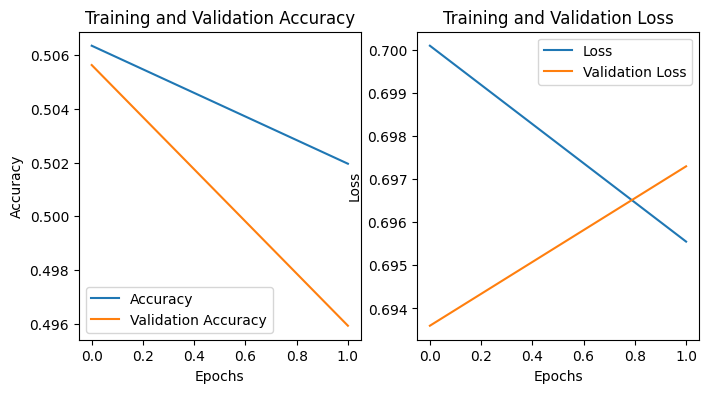

In [29]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

# Predicting a Word Using the Trained CBOW Model

In this step, we define a function to predict a word based on a given context using the trained CBOW model.

1. **Function: `predict_word`**:
   - **Input**: The function takes a list of context words as input. The number of context words should match the expected size (2 times the window size).
   - **Context sequence conversion**: The input context words are tokenized into a sequence of integers using the same tokenizer that was used during training.
   - **Input validation**: The function checks whether the length of the context sequence matches the expected size (2 times the window size). If not, it prints an error message.
   - **Prediction**: The tokenized context is fed into the trained CBOW model, which predicts the probability distribution over the vocabulary.
   - **Retrieve predicted word**: The predicted word is the one with the highest probability. The function retrieves the word corresponding to the predicted index from the tokenizer's word index.

2. **Example**:
   - We provide a sample context: `['الحادث', 'بسبب', 'مزدحم', 'الطريق']`.
   - The function predicts the word that fits best in this context, based on the model's learned weights.
   - The predicted word is printed along with the input context.

This function allows us to test the CBOW model by predicting words based on their surrounding context from the corpus.

In [30]:
text = ('الحادث بسبب الطريق  مزدحم ')

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts([text])
sample_seq = tokenizer.texts_to_sequences([text])
sample_padded = pad_sequences(sample_seq, maxlen=max_length, padding='post')

predictions = model.predict(sample_padded)
print(*predictions[0])

if predictions[0] > 0:
    print('positive')
else:
    print('negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
0.43933427
positive
